In [50]:
import matplotlib.image as mpimg

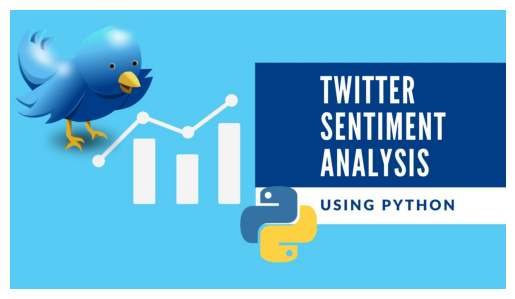

In [51]:
image_path = '/content/79592twitter.jpg'
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off'
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import LSTM, GRU, SimpleRNN, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [2]:
df_train=pd.read_csv('/content/tweets_train.csv')
df_test=pd.read_csv('/content/tweets_test.csv')

In [3]:
df_test.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text
0,Doug Webb,Probably Europe,"I develop methods for effective cooperation, w...",2015-12-12 15:22:58,157,228,496,False,2020-09-15 22:53:36,"['theSocialDilemma', 'joinMastodon']",Twitter Web App,False,Watch theSocialDilemma then joinMastodon
1,Dan Reynish,"Medicine Hat, Alberta",News Anchor at Noon and 5 pm on CHAT TV. Canad...,2011-09-10 12:17:10,1722,2500,13912,False,2020-09-12 04:43:03,['WeTheNorth'],Twitter Web App,False,With the 2019 2020 NBA season officially over ...
2,🌤,NaN,NaN,2011-06-01 02:23:57,880,585,205,False,2020-09-19 07:06:53,['TheSocialDilemma'],Twitter for iPhone,False,if you want to really know about people go tal...
3,“IT IS WHAT IT IS.”🇰🇪🇳🇿🇺🇸,WA,Heliophile🌞☀️• #Rugby • Wildlifer • #HIV • #So...,2009-04-17 13:35:02,1143,2692,11999,False,2020-09-12 18:28:18,"['TheSocialDilemma', 'Netflix']",Twitter for iPhone,False,Have you watched TheSocialDilemma on Netflix
4,Mahima Sood,NaN,Amy Dunne X Holly Golightly || Data Scientist ...,2018-01-26 21:57:22,18,65,263,False,2020-09-12 18:48:53,['TheSocialDilemma'],Twitter for iPhone,False,Highly recommend TheSocialDilemma on


In [4]:
df_train.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source,is_retweet,clean_text,Sentiment
0,Romy 👑,Bolton - England,"Tables turn, bridges burn, you live and learn.",2009-06-15 09:00:39,525,896,3854,False,2020-09-19 15:19:32,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TLynn Peterson,"Black Canyon City, Arizona",Acquired disability ♿ after an accident. Livin...,2013-05-29 00:17:46,5045,5374,48152,False,2020-09-13 00:31:46,['TheSocialDilemma'],Twitter for Android,False,TheSocialDilemma If we don t agree on what is ...,Positive
2,Rutger Kosters,Netherlands,Cloud Solution Architect @NetApp | VCDX #209 |...,2014-10-07 09:34:10,574,251,1070,False,2020-09-09 21:10:33,['TheSocialDilemma'],Twitter for Android,False,Watching TheSocialDilemma scary to see social ...,Negative
3,IDFWU🗯🇿🇼🇿🇦,"East London, South Africa","YOU HAVE OPTIONS, YOU CAN’T JUST TAKE WHAT LIF...",2012-08-22 11:09:06,706,618,1320,False,2020-09-11 04:33:08,NaN,Twitter for Android,False,You check your social media before you pee in ...,Positive
4,Treebel,NaN,NaN,2010-09-25 07:25:31,9,13,55,False,2020-09-17 16:27:38,['thesocialdilemma'],Twitter for iPhone,False,watch thesocialdilemma and see what s actually...,Negative


In [5]:
df_train.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'is_retweet', 'clean_text', 'Sentiment'],
      dtype='object')

In [6]:
df_test.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'is_retweet', 'clean_text'],
      dtype='object')

In [7]:
df_train=df_train[['clean_text','Sentiment']]
df_train.head()

,clean_text,Sentiment
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral
1,TheSocialDilemma If we don t agree on what is ...,Positive
2,Watching TheSocialDilemma scary to see social ...,Negative
3,You check your social media before you pee in ...,Positive
4,watch thesocialdilemma and see what s actually...,Negative


In [8]:
df_test=df_test[['clean_text']]

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
def tokenize_words(text):
  if isinstance(text,str):
    return len(nltk.word_tokenize(text))
  else:
    return 0
df_train['Sent_Count'] = df_train['clean_text'].apply(tokenize_words)

df_train['Word_count'] = df_train['clean_text'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [11]:
df_train.head()

,clean_text,Sentiment,Sent_Count,Word_count
0,TheSocialDilemma is an eye opener isn t it ple...,Neutral,17,1
1,TheSocialDilemma If we don t agree on what is ...,Positive,24,1
2,Watching TheSocialDilemma scary to see social ...,Negative,16,1
3,You check your social media before you pee in ...,Positive,23,1
4,watch thesocialdilemma and see what s actually...,Negative,17,1


In [12]:
df_train['Sentiment'].value_counts()

Positive    3001
Neutral     2287
Negative    1166
Name: Sentiment, dtype: int64

In [13]:
neutral=df_train['Sentiment'] == 'Neutral'
positive=df_train['Sentiment']=='Positive'
negative=df_train['Sentiment']=='Negative'

<Axes: xlabel='Sent_Count', ylabel='Count'>

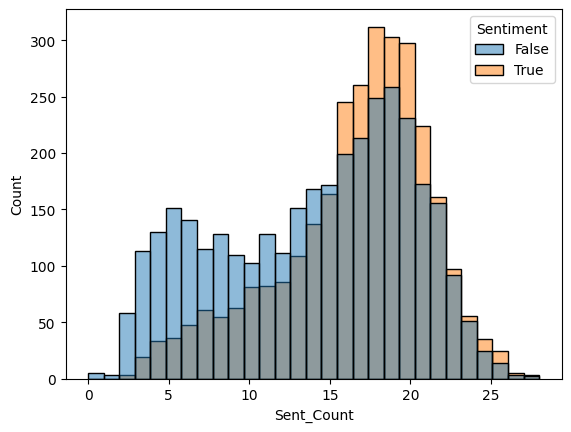

In [14]:
sns.histplot(data=df_train,hue=positive,x='Sent_Count')

In [15]:
df_test.shape

(3068, 1)

In [16]:
df_test.isnull().sum()

clean_text    1
dtype: int64

In [17]:
df_train.isnull().sum()

clean_text    5
Sentiment     1
Sent_Count    0
Word_count    0
dtype: int64

In [18]:
df_train = df_train.dropna(subset=['clean_text'])

In [19]:
df_test = df_test.dropna(subset=['clean_text'])

In [20]:
tokenizer=Tokenizer()

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['clean_text'])

In [22]:
tokenizer_test = Tokenizer()
tokenizer_test.fit_on_texts(df_test['clean_text'])

In [23]:
total_words_test=len(tokenizer_test.word_index)+1
total_words_test

5045

In [24]:
total_words=len(tokenizer.word_index)+1
total_words

7537

In [25]:
sequences = tokenizer.texts_to_sequences(df_train['clean_text'])
padded_sequences = pad_sequences(sequences)

In [26]:
sequences = tokenizer.texts_to_sequences(df_test['clean_text'])
padded_sequences_test = pad_sequences(sequences)

In [27]:
padded_sequences[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,   10,   52,  100,  217,  262,   24,    9,   90, 1836,    2,
        125,   13,   37,  248,   28,    9], dtype=int32)

In [28]:
labels = df_train['Sentiment']
labels

0        Neutral
1       Positive
2       Negative
3       Positive
4       Negative
          ...   
6449     Neutral
6450    Positive
6451     Neutral
6452    Negative
6453    Positive
Name: Sentiment, Length: 6450, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [46]:
encoded_labels

array([1, 2, 0, ..., 1, 0, 2])

In [30]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=12677, input_length=padded_sequences.shape[1]))
model.add(LSTM(100))
model.add(Dense(3, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history=model.fit(padded_sequences, encoded_labels, epochs=10, validation_split=0.2)

Epoch 1/10
162/162 [==============================] - 19s 99ms/step - loss: 0.6616 - accuracy: 0.7300 - val_loss: 0.4339 - val_accuracy: 0.8488
Epoch 2/10
162/162 [==============================] - 9s 52ms/step - loss: 0.1669 - accuracy: 0.9411 - val_loss: 0.4503 - val_accuracy: 0.8628
Epoch 3/10
162/162 [==============================] - 7s 43ms/step - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.5450 - val_accuracy: 0.8721
Epoch 4/10
162/162 [==============================] - 7s 44ms/step - loss: 0.0157 - accuracy: 0.9953 - val_loss: 0.6318 - val_accuracy: 0.8643
Epoch 5/10
162/162 [==============================] - 6s 39ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.6356 - val_accuracy: 0.8752
Epoch 6/10
162/162 [==============================] - 7s 41ms/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.6270 - val_accuracy: 0.8744
Epoch 7/10
162/162 [==============================] - 6s 39ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.6560 - val_accuracy: 0.880

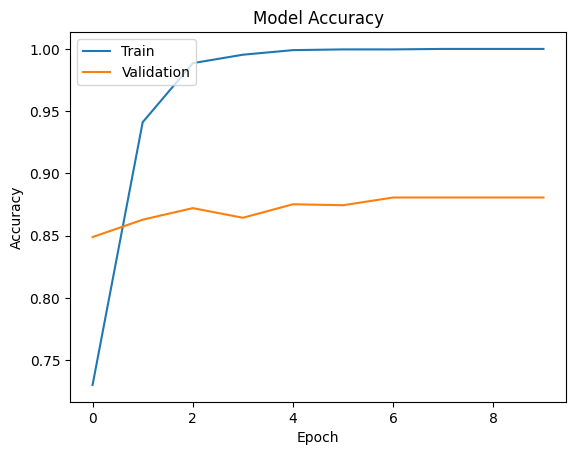

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
predictions = model.predict(padded_sequences_test)

96/96 [==============================] - 2s 9ms/step


In [48]:
padded_sequences_test[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 12,  1, 70], dtype=int32)

In [42]:
d=pd.DataFrame(predictions)

In [43]:
d

,0,1,2
0,0.000058,0.999884,0.000057
1,0.001267,0.865921,0.132812
2,0.030158,0.000045,0.969797
3,0.000026,0.999737,0.000237
4,0.000023,0.000007,0.999970
...,...,...,...
3062,0.000007,0.999972,0.000021
3063,0.000527,0.256410,0.743062
3064,0.000020,0.999955,0.000025
3065,0.000008,0.000003,0.999989
